<a href="https://colab.research.google.com/github/AUT-Student/SML-Project/blob/main/SML_Project_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.linear_model import Lasso

# Dataset

In [2]:
!gdown 1mFilhzDbZqb4xC6ifBLPjha1Svmqcr9X

Downloading...
From: https://drive.google.com/uc?id=1mFilhzDbZqb4xC6ifBLPjha1Svmqcr9X
To: /content/SML_Project_Dataset.zip
100% 436k/436k [00:00<00:00, 75.9MB/s]


In [3]:
!unzip /content/SML_Project_Dataset.zip

Archive:  /content/SML_Project_Dataset.zip
  inflating: Gold.csv                
  inflating: Kekhak.csv              
  inflating: Khodro.csv              
  inflating: Overall.csv             
  inflating: Shasta.csv              
  inflating: Atlas.csv               
  inflating: Dollar.csv              
  inflating: Foolad.csv              


In [4]:
overall_dataset = pd.read_csv("/content/Overall.csv")
overall_dataset["<DTYYYYMMDD>"] = overall_dataset["Date"].apply(lambda x:int(x[:4]+x[5:7]+x[8:10]))
overall_dataset["Return"] = overall_dataset["Close"].diff()/overall_dataset["Close"]

In [5]:
gold_dataset = pd.read_csv("/content/Gold.csv")
gold_dataset["<DTYYYYMMDD>"] = gold_dataset["Date"].apply(lambda x:int(x[:4]+x[5:7]+x[8:10]))
gold_dataset["Return"] = gold_dataset["Close"].diff()/gold_dataset["Close"]

In [6]:
atlas_dataset = pd.read_csv("/content/Atlas.csv").sort_values("<DTYYYYMMDD>")
foolad_dataset = pd.read_csv("/content/Foolad.csv").sort_values("<DTYYYYMMDD>")
khodro_dataset = pd.read_csv("/content/Khodro.csv").sort_values("<DTYYYYMMDD>")

datasets = {
    "Atlas": atlas_dataset,
    "Foolad": foolad_dataset,
    "Khodro": khodro_dataset,
}

for name in datasets:
  dataset = datasets[name]
  dataset = dataset[(dataset["<DTYYYYMMDD>"] >= 20210101) & (dataset["<DTYYYYMMDD>"] <= 20221230)]
  dataset["Return"] = dataset["<CLOSE>"].diff()/dataset["<CLOSE>"]  
  datasets[name] = dataset

<ipython-input-6-dc2145b19b1d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Return"] = dataset["<CLOSE>"].diff()/dataset["<CLOSE>"]


In [7]:
ensymble_dataset = overall_dataset[["<DTYYYYMMDD>", "Return"]].set_index("<DTYYYYMMDD>")

for name in datasets:
  ensymble_dataset = datasets[name][["<DTYYYYMMDD>", "Return"]].rename(columns={"Return":f"Return_{name}"})\
                  .set_index("<DTYYYYMMDD>")\
                  .join(ensymble_dataset,
                        how="inner")\
                  .dropna()

ensymble_dataset = gold_dataset[["<DTYYYYMMDD>", "Return"]]\
                .set_index("<DTYYYYMMDD>")\
                .join(ensymble_dataset,
                      how="inner", lsuffix='_Gold', rsuffix='_Overall')\
                .dropna()

# Linear Regression

In [61]:
def mse(real, pred):
  return np.mean((real-pred)**2)

In [62]:
def normal_equation(X, Y):
  return np.linalg.inv(X.T @ X) @ X.T @ Y

## Only One Day

In [7]:
dataset = overall_dataset[["Date", "Return"]]

In [8]:
dataset["Prev-Return"] = dataset["Return"].shift(1)

<ipython-input-8-f85bb46906f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Prev-Return"] = dataset["Return"].shift(1)


In [9]:
dataset.dropna(inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [10]:
n = len(dataset)

In [11]:
X = np.stack([dataset["Prev-Return"].values, np.full(n, 1)], axis=-1)
Y = dataset["Return"].values

In [12]:
X_train, X_test = X[:int(0.8*n)], X[int(0.8*n):]
Y_train, Y_test = Y[:int(0.8*n)], Y[int(0.8*n):]

In [13]:
beta = normal_equation(X_train, Y_train)
Y_predicted = X_test @ beta

In [14]:
print(f"beta = {beta}")

beta = [3.64704067e-01 6.04380566e-05]


In [17]:
print(f"MSE = {mse(Y_predicted, Y_test)}")

MSE = 0.00012154226517688195


In [18]:
print(f"MSE = {mse(np.full(len(Y_test), np.mean(Y_train)), Y_test)}")

MSE = 0.00012681306672943842


## 5 Days

In [19]:
dataset = overall_dataset[["Date", "Return"]]

In [20]:
dataset["Prev-1-Return"] = dataset["Return"].shift(1)
dataset["Prev-2-Return"] = dataset["Return"].shift(2)
dataset["Prev-3-Return"] = dataset["Return"].shift(3)
dataset["Prev-4-Return"] = dataset["Return"].shift(4)
dataset["Prev-5-Return"] = dataset["Return"].shift(5)

<ipython-input-20-5324ea868e2a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Prev-1-Return"] = dataset["Return"].shift(1)
<ipython-input-20-5324ea868e2a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Prev-2-Return"] = dataset["Return"].shift(2)
<ipython-input-20-5324ea868e2a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [21]:
dataset.dropna(inplace=True)

In [22]:
n = len(dataset)

In [23]:
X = np.stack([dataset["Prev-1-Return"].values,
              dataset["Prev-2-Return"].values,
              dataset["Prev-3-Return"].values,
              dataset["Prev-4-Return"].values,
              dataset["Prev-5-Return"].values,
              np.full(n, 1)], axis=-1)

Y = dataset["Return"].values

In [24]:
X_train, X_test = X[:int(0.8*n)], X[int(0.8*n):]
Y_train, Y_test = Y[:int(0.8*n)], Y[int(0.8*n):]

In [25]:
beta = normal_equation(X_train, Y_train)
Y_predicted = X_test @ beta

In [26]:
print(f"beta = {beta}")

beta = [ 4.56770336e-01 -2.52268650e-01  1.85632566e-01 -1.09778456e-01
  2.29407719e-02  2.14118287e-04]


In [27]:
print(f"MSE = {mse(Y_predicted, Y_test)}")

MSE = 0.00012847180856263225


# Classification

In [8]:
dataset = overall_dataset[["Date", "Return"]]

In [9]:
dataset["Prev-Return"] = dataset["Return"].shift(1)

<ipython-input-9-f85bb46906f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Prev-Return"] = dataset["Return"].shift(1)


In [10]:
dataset.dropna(inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [11]:
X = dataset["Prev-Return"].values
Y = (dataset["Return"] >= 0).values

In [12]:
n = len(dataset)

In [13]:
X_train, X_test = X[:int(0.8*n)], X[int(0.8*n):]
Y_train, Y_test = Y[:int(0.8*n)], Y[int(0.8*n):]

In [14]:
X_train_p = X_train[Y_train]
X_train_n = X_train[Y_train==False]

In [58]:
normal_p_mean = np.mean(X_train_p)
normal_p_var = np.var(X_train_p)
print(f"Positive Normal Params: {normal_p_mean}, {normal_p_var}")

Positive Normal Params: 0.003034647813411533, 0.0001554185379466679


In [59]:
normal_n_mean = np.mean(X_train_n)
normal_n_var = np.var(X_train_n)
print(f"Negative Normal Params: {normal_n_mean}, {normal_n_var}")

Negative Normal Params: -0.002910032804687265, 0.00012366374694993074


In [60]:
prior_p = len(X_train_p) / (len(X_train_p)+len(X_train_n))
prior_n = len(X_train_n) / (len(X_train_p)+len(X_train_n))
print(f"#positive = {len(X_train_p)}, #negative = {len(X_train_n)}")

#positive = 193, #negative = 187


In [61]:
def classification(X):
  prob_p = prior_p * scipy.stats.norm(normal_p_mean, normal_p_var).pdf(X) 
  prob_n = prior_n * scipy.stats.norm(normal_n_mean, normal_n_var).pdf(X) 
  
  return prob_p >= prob_n

In [62]:
Y_predicted = classification(X_test)

In [63]:
def accuracy(real, pred):
  return sum(real==pred) / len(real)

In [64]:
accuracy(Y_test, Y_predicted)

0.5833333333333334

In [65]:
max(sum(Y_test), sum(Y_test==False))/len(Y_test)

0.53125

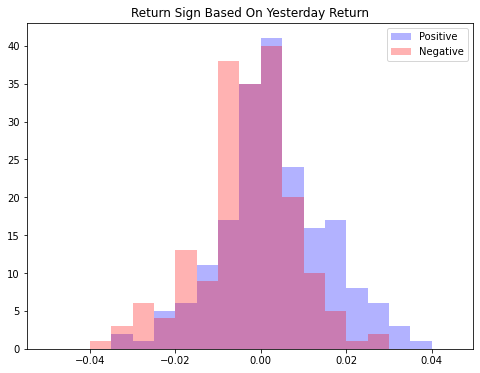

In [66]:
plt.hist(X_train[Y_train], alpha=0.3, color="blue", label="Positive", bins=np.arange(-0.05, +0.05, 0.005))
plt.hist(X_train[Y_train==False], alpha=0.3, color="red", label="Negative", bins=np.arange(-0.05, +0.05, 0.005))

plt.title("Return Sign Based On Yesterday Return")

plt.legend()

plt.gcf().set_size_inches(8, 6)
plt.show()

# Ensymble Linear Regression

In [41]:
dataset = ensymble_dataset

In [42]:
dataset["Prev_Return_Overall"] = dataset["Return_Overall"].shift(1)
dataset["Prev_Return_Gold"] = dataset["Return_Gold"].shift(1)
dataset["Prev_Return_Khodro"] = dataset["Return_Khodro"].shift(1)
dataset["Prev_Return_Foolad"] = dataset["Return_Foolad"].shift(1)
dataset["Prev_Return_Atlas"] = dataset["Return_Atlas"].shift(1)

In [43]:
dataset.dropna(inplace=True)

In [44]:
n = len(dataset)

In [46]:
X = np.stack([dataset["Prev_Return_Overall"].values,
              dataset["Prev_Return_Gold"].values,
              dataset["Prev_Return_Khodro"].values,
              dataset["Prev_Return_Foolad"].values,
              dataset["Prev_Return_Atlas"].values,
              np.full(n, 1)], axis=-1)

Y = dataset["Return_Overall"].values

In [47]:
X_train, X_test = X[:int(0.8*n)], X[int(0.8*n):]
Y_train, Y_test = Y[:int(0.8*n)], Y[int(0.8*n):]

In [48]:
beta = normal_equation(X_train, Y_train)
Y_predicted = X_test @ beta

In [49]:
print(f"beta = {beta}")

beta = [ 2.78867127e-01  1.10756277e-01 -1.06491391e-02  3.45701655e-03
  3.67020112e-02  1.06598713e-04]


In [50]:
print(f"MSE = {mse(Y_predicted, Y_test)}")

MSE = 9.843054010688481e-05


# Ensymble Classification

In [18]:
def classification(X):
  prob_p = prior_p * scipy.stats.multivariate_normal(normal_p_mean, normal_p_cov).pdf(X) 
  prob_n = prior_n * scipy.stats.multivariate_normal(normal_n_mean, normal_n_cov).pdf(X) 
  
  return prob_p >= prob_n

In [20]:
def accuracy(real, pred):
  return sum(real==pred) / len(real)

In [8]:
dataset = ensymble_dataset

In [9]:
dataset["Prev_Return_Overall"] = dataset["Return_Overall"].shift(1)
dataset["Prev_Return_Gold"] = dataset["Return_Gold"].shift(1)
dataset["Prev_Return_Khodro"] = dataset["Return_Khodro"].shift(1)
dataset["Prev_Return_Foolad"] = dataset["Return_Foolad"].shift(1)
dataset["Prev_Return_Atlas"] = dataset["Return_Atlas"].shift(1)

In [10]:
dataset.dropna(inplace=True)

In [11]:
n = len(dataset)

In [27]:
X = np.stack([dataset["Prev_Return_Overall"].values]
             , axis=-1)

Y = (dataset["Return_Overall"] > 0).values

X_train, X_test = X[:int(0.8*n)], X[int(0.8*n):]
Y_train, Y_test = Y[:int(0.8*n)], Y[int(0.8*n):]

X_train_p = X_train[Y_train]
X_train_n = X_train[Y_train==False]

normal_p_mean = np.mean(X_train_p, axis=0)
normal_p_cov = np.cov(X_train_p, rowvar=0)

normal_n_mean = np.mean(X_train_n, axis=0)
normal_n_cov = np.cov(X_train_n, rowvar=0)

prior_p = len(X_train_p) / (len(X_train_p)+len(X_train_n))
prior_n = len(X_train_n) / (len(X_train_p)+len(X_train_n))

Y_predicted = classification(X_test)

In [28]:
accuracy(Y_test, Y_predicted)

0.6941176470588235

In [47]:
X = np.stack([dataset["Prev_Return_Overall"].values,
              dataset["Prev_Return_Gold"].values,
              dataset["Prev_Return_Khodro"].values,
              dataset["Prev_Return_Foolad"].values,
              dataset["Prev_Return_Atlas"].values,
              ]
             , axis=-1)

Y = (dataset["Return_Overall"] > 0).values

X_train, X_test = X[:int(0.8*n)], X[int(0.8*n):]
Y_train, Y_test = Y[:int(0.8*n)], Y[int(0.8*n):]

X_train_p = X_train[Y_train]
X_train_n = X_train[Y_train==False]

normal_p_mean = np.mean(X_train_p, axis=0)
normal_p_cov = np.cov(X_train_p, rowvar=0)

normal_n_mean = np.mean(X_train_n, axis=0)
normal_n_cov = np.cov(X_train_n, rowvar=0)

prior_p = len(X_train_p) / (len(X_train_p)+len(X_train_n))
prior_n = len(X_train_n) / (len(X_train_p)+len(X_train_n))

Y_predicted = classification(X_test)

In [48]:
accuracy(Y_test, Y_predicted)

0.49411764705882355

In [49]:
X = np.stack([dataset["Prev_Return_Overall"].values,
              dataset["Prev_Return_Gold"].values,
              dataset["Prev_Return_Khodro"].values,
              # dataset["Prev_Return_Foolad"].values,
              dataset["Prev_Return_Atlas"].values,
              ]
             , axis=-1)

Y = (dataset["Return_Overall"] > 0).values

X_train, X_test = X[:int(0.8*n)], X[int(0.8*n):]
Y_train, Y_test = Y[:int(0.8*n)], Y[int(0.8*n):]

X_train_p = X_train[Y_train]
X_train_n = X_train[Y_train==False]

normal_p_mean = np.mean(X_train_p, axis=0)
normal_p_cov = np.cov(X_train_p, rowvar=0)

normal_n_mean = np.mean(X_train_n, axis=0)
normal_n_cov = np.cov(X_train_n, rowvar=0)

prior_p = len(X_train_p) / (len(X_train_p)+len(X_train_n))
prior_n = len(X_train_n) / (len(X_train_p)+len(X_train_n))

Y_predicted = classification(X_test)

In [50]:
accuracy(Y_test, Y_predicted)

0.6235294117647059

# LASSO Regresion

In [64]:
dataset = overall_dataset[["Date", "Return"]]

In [65]:
for i in range(1, 11):
  dataset[f"Prev-{i}-Return"] = dataset["Return"].shift(i)

<ipython-input-65-aab302d415a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[f"Prev-{i}-Return"] = dataset["Return"].shift(i)


In [66]:
dataset.dropna(inplace=True)

In [68]:
n = len(dataset)

In [69]:
X = np.stack([dataset["Prev-1-Return"].values,
              dataset["Prev-2-Return"].values,
              dataset["Prev-3-Return"].values,
              dataset["Prev-4-Return"].values,
              dataset["Prev-5-Return"].values,
              dataset["Prev-6-Return"].values,
              dataset["Prev-7-Return"].values,
              dataset["Prev-8-Return"].values,
              dataset["Prev-9-Return"].values,
              dataset["Prev-10-Return"].values,
              np.full(n, 1)], axis=-1)

Y = dataset["Return"].values

In [70]:
X_train, X_test = X[:int(0.8*n)], X[int(0.8*n):]
Y_train, Y_test = Y[:int(0.8*n)], Y[int(0.8*n):]

In [78]:
for alpha in [0, 0.01, 0.1, 0.2, 0.5, 1, 2, 4, 8, 64]:
  lasso_regression = Lasso(normalize=True, alpha=alpha)
  lasso_regression.fit(X_train, Y_train)  
  Y_predicted = lasso_regression.predict(X_test)
  print(f"Alpha = {alpha} MSE = {mse(Y_predicted, Y_test)}")

Alpha = 0 MSE = 0.0001243985214808293
Alpha = 0.01 MSE = 0.0001273466432473387
Alpha = 0.1 MSE = 0.0001273466432473387
Alpha = 0.2 MSE = 0.0001273466432473387
Alpha = 0.5 MSE = 0.0001273466432473387
Alpha = 1 MSE = 0.0001273466432473387
Alpha = 2 MSE = 0.0001273466432473387
Alpha = 4 MSE = 0.0001273466432473387
Alpha = 8 MSE = 0.0001273466432473387
Alpha = 64 MSE = 0.0001273466432473387


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
<ipython-input-78-7f7f6ed096d1>:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_regression.fit(X_train, Y_train)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: 